# 120 years of Summer Olympics Dataset | Beginner EDA

## Some information about the Dataset

This is a [dataset](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) containing records of the modern olympics, spanning from 1896, Athens Olympics to 2016, Rio Olympics. The dataset contains **271116 instances and 15 attributes** .

Each row corresponds to an individual athlete competing in an Event of a respective sport. Some of the attributes are as follows:

1. ID- Unique Athlete ID
2. Name - Athlete's Name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. Medal- Gold, Silver, Bronze


## Credit and References

* https://www.kaggle.com/vishnuarun22/summer-olympics-dataset-beginner-eda/notebook (Notebook)


* https://www.kaggle.com/marcogdepinto/let-s-discover-more-about-the-olympic-game (Notebook)


* https://www.youtube.com/watch?v=kLDTbavcmd0&t=5315s&ab_channel=Jovian (YouTube)



## Import Modules

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Importing

In [2]:
#Reading the athletics data using pandas
athletics_data = pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
#Reading the National Olympic Committee(NOC) Data
regions = pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

## Collecting information about the datasets 

We will read the first few lines and collect the statsitical information about the datasets.

In [3]:
athletics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
athletics_data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
athletics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


**Note:** I am not going to use the region dataset in the further analysis as I am not using the region attribute of this dataset.

## Data Preparation and Cleaning

The sole purpose of this analysis is analysing the Summer Olympics dataset. We will separate the summer and winter olympics and will only analyse the summer olympics data.

In [7]:
df1_summer = athletics_data[athletics_data['Season'] == 'Summer']

In [8]:
df1_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [9]:
df1_summer.describe()

,ID,Age,Height,Weight,Year
count,222552.000000,213363.000000,170695.000000,168698.00000,222552.000000
mean,67998.925712,25.674053,175.515551,70.68906,1976.317094
std,39139.038228,6.699839,10.914725,14.80394,30.942802
min,1.000000,10.000000,127.000000,25.00000,1896.000000
25%,34000.750000,21.000000,168.000000,60.00000,1956.000000
50%,68302.500000,24.000000,175.000000,70.00000,1984.000000
75%,101881.000000,28.000000,183.000000,79.00000,2000.000000
max,135568.000000,97.000000,226.000000,214.00000,2016.000000


Few points we can understand by applying describe() method on our dataset.

1. We can see there is a person with a minimum age of 10 years. Which is very interesting, let's confirm this.

2. There are a few missing values in the columns Height, Weight and Age.

In [10]:
df1_summer[df1_summer['Age'] == 10]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


After googling I confirmed that Dimitrios Loundras existed and he was a Greek gymnast who competed at the 1896 Summer Olympics in Athens and he also won a Bronze medal.

Now let's see which other columns have the missing values except Height, Weight and Age. 

We will use isna() method to find the missing values.

In [11]:
df1_summer.isna()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
26,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


isna() method has returned the dataframe full of boolean values, as our data frame has 222552 rows, so its difficult to interpret the result completely. For that reason we can apply the sum() method to get the number of missing values in the respective columns.

In [12]:
df1_summer.isna().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
dtype: int64

Now we can see the columns Age, Weight, Height and Medal have the null values. Let's convert the result into percentage and plot the output.

In [13]:
missing_percentages = df1_summer.isna().sum().sort_values(ascending = False) * 100 /len(df1_summer)
missing_percentages

Medal     84.683130
Weight    24.198390
Height    23.301071
Age        4.128923
ID         0.000000
Name       0.000000
Sex        0.000000
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
dtype: float64

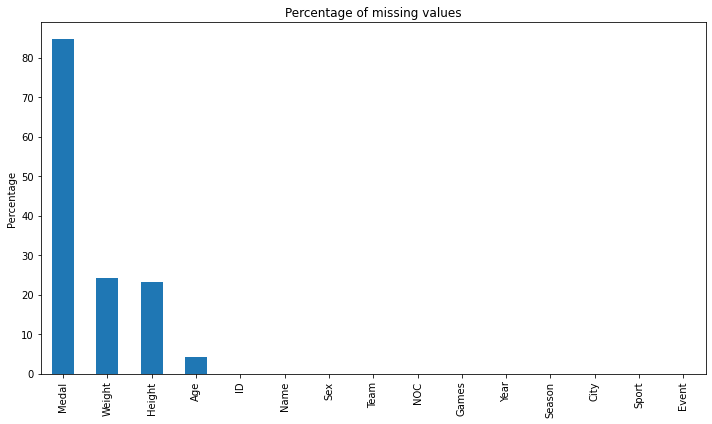

In [14]:
# Plot the missing values
plt.figure(figsize = (10,6))
plt.ylabel('Percentage')
plt.title('Percentage of missing values')
missing_percentages.plot(kind = 'bar')
plt.tight_layout()
plt.show()

In any competition only 3 medals can be given Gold, Silver and Broze so that can a reason for more than 80% of the missing values in the Medal column. 

Now, let's fill the missing data with the appropriate values to proceed with our analysis.

In [15]:
df1_summer['Medal'].fillna('Not Won', inplace = True) # Replacing missing values in Medal column by "Not Won"

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [16]:
df1_summer['Weight'].fillna(df1_summer['Weight'].mean(), inplace = True)# Replacing missing values in Weight Column by a mean weight

In [17]:
df1_summer['Height'].fillna(df1_summer['Height'].mean(), inplace = True)# Replacing missing values in Height Column by a mean height

In [18]:
df1_summer['Age'].fillna(df1_summer['Age'].mean(), inplace = True)# Replacing missing values in Age Column by a mean Age

In [19]:
df1_summer.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Now let's check if there are any duplicated values in our dataset. We will the duplicated() method.

In [20]:
df1_summer.duplicated()

0         False
1         False
2         False
3         False
26        False
          ...  
271106    False
271107    False
271108    False
271109    False
271110    False
Length: 222552, dtype: bool

In [21]:
df1_summer.duplicated().sum()

1385

We have 1385 rows which are duplicated. Let's drop these duplicated values and then proceed with our Analysis and Visualization.

We do not drop all the rows, we keep the first row of all the duplicated rows.

In [22]:
df1_summer.drop_duplicates(keep = 'first', inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [23]:
df1_summer.duplicated().sum()

0

## Exploratory Analysis and Visualization

### Columns we'll analyze:

   * Medal
   * Year
   * Age
   * Sport
   * Sex

## Questions to be answered?


   * Which teams secured the maximum number of medals in total?

   * Which year has the least number of participants?
    
   * What is the age of participants those who participated in olympics?
    
   * Which sports have the maximum participation in the summer olympics?

   * What is the male and female participation trend?

 

### Question 1: Which teams secured the maximum number of medals in total?

Before we answer this question we need to know that, Soviet Union was broken into smaller countries in the year 1991. So, while comparing the teams we will separate the analysis for this question into two parts, one for the years before 1991 and another for the years after 1991.

In [24]:
df1_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.00000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Not Won
1,2,A Lamusi,M,23.0,170.000000,60.00000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Not Won
2,3,Gunnar Nielsen Aaby,M,24.0,175.515551,70.68906,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Not Won
3,4,Edgar Lindenau Aabye,M,34.0,175.515551,70.68906,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,70.68906,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Not Won


### Medals won by the teams before 1991

In [25]:
filt = df1_summer['Year'] < 1991
df_summer_before1991 = df1_summer[filt]

In [26]:
gold_df = df_summer_before1991[df_summer_before1991['Medal'] == 'Gold'].groupby(by = "Team").count().sort_values(by = "ID",ascending = False).reset_index()
gold_df.head()

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
0,United States,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449
1,Soviet Union,830,830,830,830,830,830,830,830,830,830,830,830,830,830
2,Italy,374,374,374,374,374,374,374,374,374,374,374,374,374,374
3,East Germany,337,337,337,337,337,337,337,337,337,337,337,337,337,337
4,Hungary,321,321,321,321,321,321,321,321,321,321,321,321,321,321


United States, Soviet Union and Italy are the top 3 countries which bragged the maximum number of Gold Medals from 1896 to 1991.

Now, let's plot the top 10 countries who won gold in Olympics before 1991.

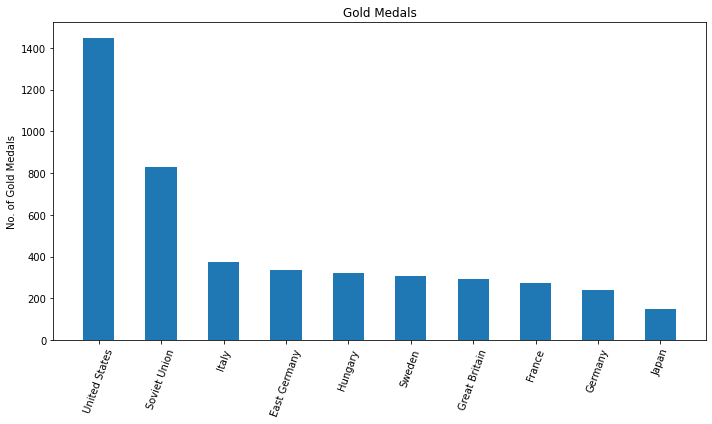

In [27]:
plt.figure(figsize = (10,6))
plt.bar(x = 'Team', height = 'Medal', data = gold_df.head(10), width = 0.5)
plt.xticks(rotation=70);
plt.ylabel("No. of Gold Medals")
plt.title('Gold Medals')
plt.tight_layout()
plt.show()

Similarly, we can find out the teams which have won the maximum number of Silver and Bronze Medals before 1991.

In [28]:
silver_df = df_summer_before1991[df_summer_before1991['Medal'] == 'Silver'].groupby(by = "Team").count().sort_values(by = "ID",ascending = False).reset_index()
silver_df.head()

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
0,United States,792,792,792,792,792,792,792,792,792,792,792,792,792,792
1,Soviet Union,635,635,635,635,635,635,635,635,635,635,635,635,635,635
2,Great Britain,407,407,407,407,407,407,407,407,407,407,407,407,407,407
3,France,323,323,323,323,323,323,323,323,323,323,323,323,323,323
4,Italy,304,304,304,304,304,304,304,304,304,304,304,304,304,304


United Stated, Soviet Union and Great Britain are the top 3 countries which managed to get the maximum number of Silver Medals from 1896 to 1991.

Let's visualize the top 10 countries which bragged maximum number of Silver Medals from 1896 to 1991.

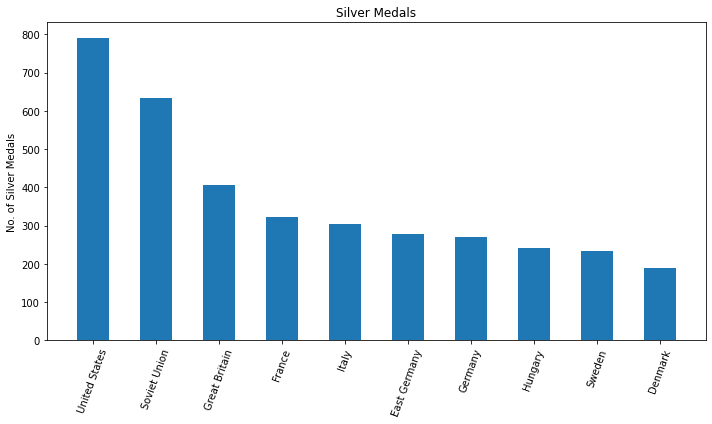

In [29]:
plt.figure(figsize = (10,6))
plt.bar(x = 'Team', height = 'Medal', data = silver_df.head(10), width = 0.5)
plt.xticks(rotation=70);
plt.ylabel("No. of Silver Medals")
plt.title('Silver Medals')
plt.tight_layout()
plt.show()

In [30]:
bronze_df = df_summer_before1991[df_summer_before1991['Medal'] == 'Bronze'].groupby(by = "Team").count().sort_values(by = "ID",ascending = False).reset_index()
bronze_df.head()

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
0,United States,666,666,666,666,666,666,666,666,666,666,666,666,666,666
1,Soviet Union,596,596,596,596,596,596,596,596,596,596,596,596,596,596
2,Great Britain,369,369,369,369,369,369,369,369,369,369,369,369,369,369
3,France,338,338,338,338,338,338,338,338,338,338,338,338,338,338
4,Hungary,305,305,305,305,305,305,305,305,305,305,305,305,305,305


Again, United States, Soviet Union and Great Britain are the top 3 countries which managed to get the maximum number of Bronze Medals from 1896 to 1991.

Let's visualize the top 10 countries.

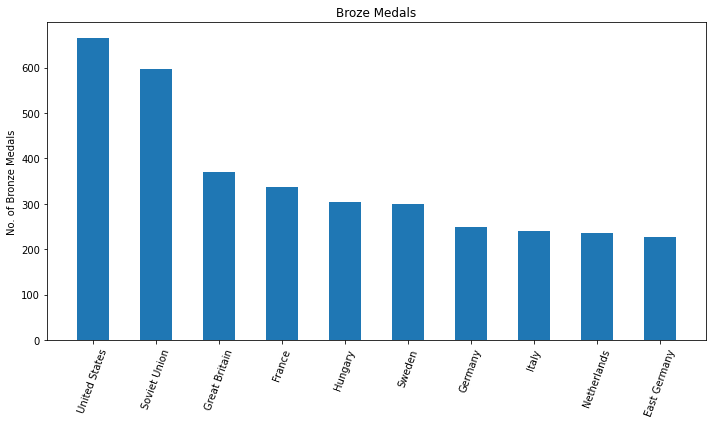

In [31]:
plt.figure(figsize = (10,6))
plt.bar(x = 'Team', height = 'Medal', data = bronze_df.head(10), width = 0.5)
plt.xticks(rotation=70);
plt.ylabel("No. of Bronze Medals")
plt.title('Broze Medals')
plt.tight_layout()
plt.show()

Now let's move to the next part and analyse the countries after the year 1991

### Medals won by the countries after 1991

In [32]:
filt = df1_summer['Year'] >= 1991
df_summer_after1991 = df1_summer[filt]

In [33]:
gold_df = df_summer_after1991[df_summer_after1991['Medal'] == 'Gold'].groupby(by = "Team").count().sort_values(by = "ID",ascending = False).reset_index()
gold_df.head()

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
0,United States,884,884,884,884,884,884,884,884,884,884,884,884,884,884
1,Germany,324,324,324,324,324,324,324,324,324,324,324,324,324,324
2,Russia,293,293,293,293,293,293,293,293,293,293,293,293,293,293
3,China,266,266,266,266,266,266,266,266,266,266,266,266,266,266
4,Australia,225,225,225,225,225,225,225,225,225,225,225,225,225,225


Top 3 countries which scored the maximum number of Gold Medals after the year 1991 are United States, Germany and Russia.

Let's plot the top 10 countries.

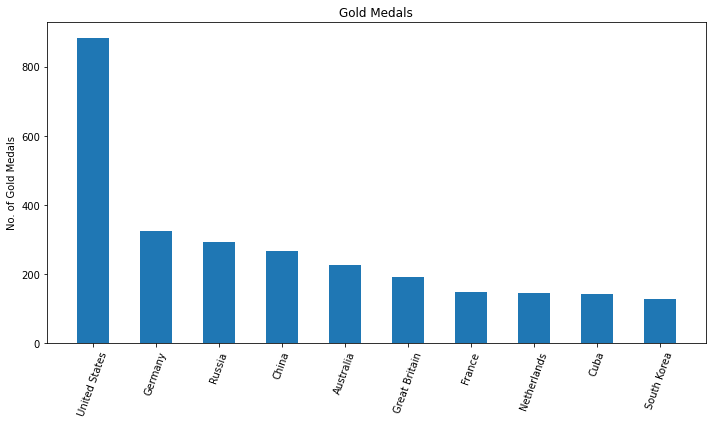

In [34]:
plt.figure(figsize = (10,6))
plt.bar(x = 'Team', height = 'Medal', data = gold_df.head(10), width = 0.5)
plt.xticks(rotation=70);
plt.ylabel("No. of Gold Medals")
plt.title('Gold Medals')
plt.tight_layout()
plt.show()

In [35]:
silver_df = df_summer_after1991[df_summer_after1991['Medal'] == 'Silver'].groupby(by = "Team").count().sort_values(by = "ID",ascending = False).reset_index()
silver_df.head()

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
0,United States,449,449,449,449,449,449,449,449,449,449,449,449,449,449
1,Australia,302,302,302,302,302,302,302,302,302,302,302,302,302,302
2,Russia,271,271,271,271,271,271,271,271,271,271,271,271,271,271
3,China,270,270,270,270,270,270,270,270,270,270,270,270,270,270
4,Germany,244,244,244,244,244,244,244,244,244,244,244,244,244,244


The top 3 countries which scored the maximum number of Silver Medals are United States, Australia and Russia.

Let's visualize the top 10 countries.

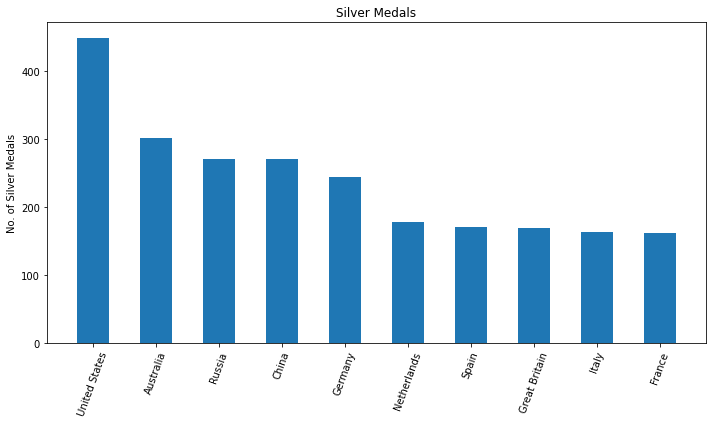

In [36]:
plt.figure(figsize = (10,6))
plt.bar(x = 'Team', height = 'Medal', data = silver_df.head(10), width = 0.5)
plt.xticks(rotation=70);
plt.ylabel("No. of Silver Medals")
plt.title('Silver Medals')
plt.tight_layout()
plt.show()

In [37]:
bronze_df = df_summer_after1991[df_summer_after1991['Medal'] == 'Bronze'].groupby(by = "Team").count().sort_values(by = "ID",ascending = False).reset_index()
bronze_df.head()

,Team,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
0,United States,446,446,446,446,446,446,446,446,446,446,446,446,446,446
1,Germany,360,360,360,360,360,360,360,360,360,360,360,360,360,360
2,Australia,343,343,343,343,343,343,343,343,343,343,343,343,343,343
3,Russia,320,320,320,320,320,320,320,320,320,320,320,320,320,320
4,Japan,189,189,189,189,189,189,189,189,189,189,189,189,189,189


Top countries which bragged the maximum number of Bronze Medals after 1991 are United States, Germany and Australia.

Let's plot the top 10 countries.

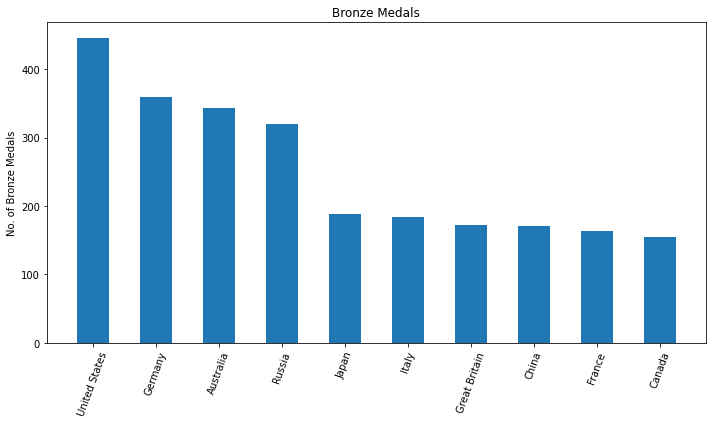

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(x = 'Team', height = 'Medal', data = bronze_df.head(10), width = 0.5)
plt.xticks(rotation=70);
plt.ylabel("No. of Bronze Medals")
plt.title('Bronze Medals')
plt.tight_layout()
plt.show()

Undoubtly, United States has bragged the maximum number of Gold, Silver and Bronze Medals in the last 120 years.
Before 1991 Soviet Union has won the most medals after United Stated followed by Great Britain or Italy.

After 1991, there are 3 countries Australia, Russia and Germany after United States which are in the medal winning race. Interestingly, some countries which were nowhere in the race of winning medals before 1991 like China are also catching the race of being the top opponent after 1991.

Now, let's see what is the trend of Medal wins over the years by the countries before and after 1991. Let's plot the line graph of medals over the years for United States, Soviet Union and Great Britain.

The idea to plot the graph is to create the dataframe for these 3 countries and select only those rows where the Medals are given. And after that group the dataframe by Year.

In [39]:
United_States_df = df_summer_before1991[(df_summer_before1991["Team"] == 'United States') & (df_summer_before1991["Medal"] != 'Not Won')]
US_Year_medal_count = United_States_df.groupby(['Year']).count().reset_index()
US_Year_medal_count.head()

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1896,20,20,20,20,20,20,20,20,20,20,20,20,20,20
1,1900,45,45,45,45,45,45,45,45,45,45,45,45,45,45
2,1904,199,199,199,199,199,199,199,199,199,199,199,199,199,199
3,1906,24,24,24,24,24,24,24,24,24,24,24,24,24,24
4,1908,65,65,65,65,65,65,65,65,65,65,65,65,65,65


In [40]:
Soviet_Union_df = df_summer_before1991[(df_summer_before1991["Team"] == 'Soviet Union') & (df_summer_before1991["Medal"] != 'Not Won')]
SU_Year_medal_count = Soviet_Union_df.groupby(['Year']).count().reset_index()
SU_Year_medal_count.head()

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1952,117,117,117,117,117,117,117,117,117,117,117,117,117,117
1,1956,169,169,169,169,169,169,169,169,169,169,169,169,169,169
2,1960,167,167,167,167,167,167,167,167,167,167,167,167,167,167
3,1964,174,174,174,174,174,174,174,174,174,174,174,174,174,174
4,1968,192,192,192,192,192,192,192,192,192,192,192,192,192,192


In [41]:
Great_Britain_df = df_summer_before1991[(df_summer_before1991["Team"] == 'Great Britain') & (df_summer_before1991["Medal"] != 'Not Won')]
GB_Year_medal_count = Great_Britain_df.groupby(['Year']).count().reset_index()
GB_Year_medal_count.head()

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1896,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,1900,22,22,22,22,22,22,22,22,22,22,22,22,22,22
2,1904,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,1906,31,31,31,31,31,31,31,31,31,31,31,31,31,31
4,1908,167,167,167,167,167,167,167,167,167,167,167,167,167,167


We will now plot all the 3 dataframes in a single plot to compare the trend of Medals won by the countries over the years.

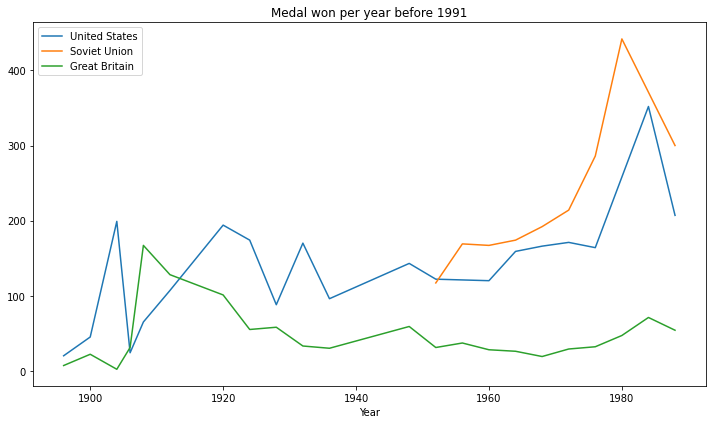

In [42]:
plt.figure(figsize=(10,6))
plt.plot('Year', 'Medal', data = US_Year_medal_count, label = 'United States')
plt.plot('Year','Medal', data = SU_Year_medal_count, label = 'Soviet Union')
plt.plot('Year','Medal', data = GB_Year_medal_count, label = 'Great Britain')

plt.legend(loc = "upper left")
plt.xlabel('Year')
plt.title('Medal won per year before 1991')
plt.tight_layout()
plt.show()


After looking at the above plot and doing some google search I got to know that Soviet Union was formed on 30 December 1922 and till 1952 Soviet Union they never participated in the Olympic games.

And we can clearly see that after participating in the Olympic Games after the year 1952 Soviet Union has established its monopoly in winning the Medals till the years it lasted. It would be interesting to investigate more about the participants of Soviet Union.

Let's continue our analysis and repeat the process to check the trend of Medals won by the top teams after 1991.

### After year 1991

In [43]:
United_States_df_1 = df_summer_after1991[(df_summer_after1991["Team"] == 'United States') & (df_summer_after1991["Medal"] != 'Not Won')]
US_Year_medal_count_1 = United_States_df_1.groupby(['Year']).count().reset_index()
US_Year_medal_count_1.head()

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1992,222,222,222,222,222,222,222,222,222,222,222,222,222,222
1,1996,255,255,255,255,255,255,255,255,255,255,255,255,255,255
2,2000,240,240,240,240,240,240,240,240,240,240,240,240,240,240
3,2004,259,259,259,259,259,259,259,259,259,259,259,259,259,259
4,2008,309,309,309,309,309,309,309,309,309,309,309,309,309,309


In [44]:
Australia_df = df_summer_after1991[(df_summer_after1991["Team"] == 'Australia') & (df_summer_after1991["Medal"] != 'Not Won')]
Au_Year_medal_count = Australia_df.groupby(['Year']).count().reset_index()
Au_Year_medal_count.head()

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1992,57,57,57,57,57,57,57,57,57,57,57,57,57,57
1,1996,130,130,130,130,130,130,130,130,130,130,130,130,130,130
2,2000,181,181,181,181,181,181,181,181,181,181,181,181,181,181
3,2004,157,157,157,157,157,157,157,157,157,157,157,157,157,157
4,2008,149,149,149,149,149,149,149,149,149,149,149,149,149,149


In [45]:
Russia_df = df_summer_after1991[(df_summer_after1991["Team"] == 'Russia') & (df_summer_after1991["Medal"] != 'Not Won')]
Rus_Year_medal_count = Russia_df.groupby(['Year']).count().reset_index()
Rus_Year_medal_count.head()

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1996,115,115,115,115,115,115,115,115,115,115,115,115,115,115
1,2000,187,187,187,187,187,187,187,187,187,187,187,187,187,187
2,2004,189,189,189,189,189,189,189,189,189,189,189,189,189,189
3,2008,142,142,142,142,142,142,142,142,142,142,142,142,142,142
4,2012,138,138,138,138,138,138,138,138,138,138,138,138,138,138


In [46]:
Germany_df = df_summer_after1991[(df_summer_after1991["Team"] == 'Germany') & (df_summer_after1991["Medal"] != 'Not Won')]
Germany_Year_medal_count = Germany_df.groupby(['Year']).count().reset_index()
Germany_Year_medal_count.head()

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1992,198,198,198,198,198,198,198,198,198,198,198,198,198,198
1,1996,122,122,122,122,122,122,122,122,122,122,122,122,122,122
2,2000,116,116,116,116,116,116,116,116,116,116,116,116,116,116
3,2004,147,147,147,147,147,147,147,147,147,147,147,147,147,147
4,2008,96,96,96,96,96,96,96,96,96,96,96,96,96,96


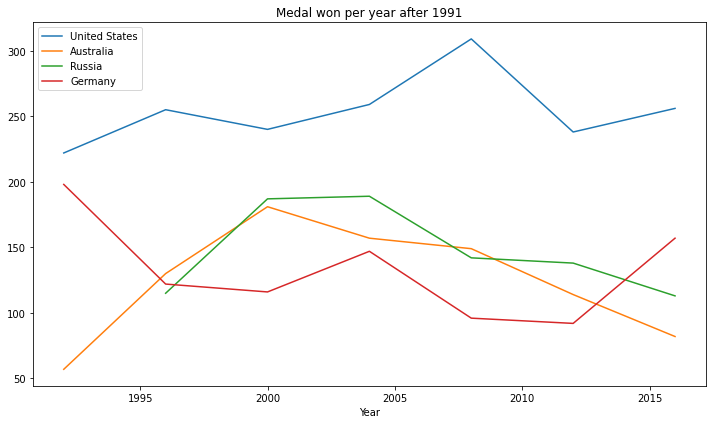

In [47]:
plt.figure(figsize = (10,6))
plt.plot('Year', 'Medal',data = US_Year_medal_count_1 ,label = 'United States')
plt.plot('Year', 'Medal',data = Au_Year_medal_count ,label = 'Australia')
plt.plot('Year', 'Medal',data = Rus_Year_medal_count ,label = 'Russia')
plt.plot('Year', 'Medal',data = Germany_Year_medal_count ,label = 'Germany')

plt.xlabel('Year')
plt.title('Medal won per year after 1991')
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

We can clearly see that USA is a unmatchable competitor after 1991 till 2016 and has won the most number of Medals, with Russia, Germany and Australia switching the spots.

Now, let's move to our second question.

### Question 2: Which year has the least number of participants?

In [48]:
df1_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.00000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Not Won
1,2,A Lamusi,M,23.0,170.000000,60.00000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Not Won
2,3,Gunnar Nielsen Aaby,M,24.0,175.515551,70.68906,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Not Won
3,4,Edgar Lindenau Aabye,M,34.0,175.515551,70.68906,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,70.68906,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Not Won


In [49]:
Year_count = df1_summer.groupby(["Year"])['ID'].count().reset_index(name = 'Count')
Year_count

,Year,Count
0,1896,380
1,1900,1898
2,1904,1301
3,1906,1733
4,1908,3069
5,1912,4040
6,1920,4292
7,1924,5110
8,1928,4656
9,1932,2465


We can clearly see that in the year 1896 only 380 people participated which is the least among all the years till 2016.

Now let's plot this graph and see what can be inferred from it.

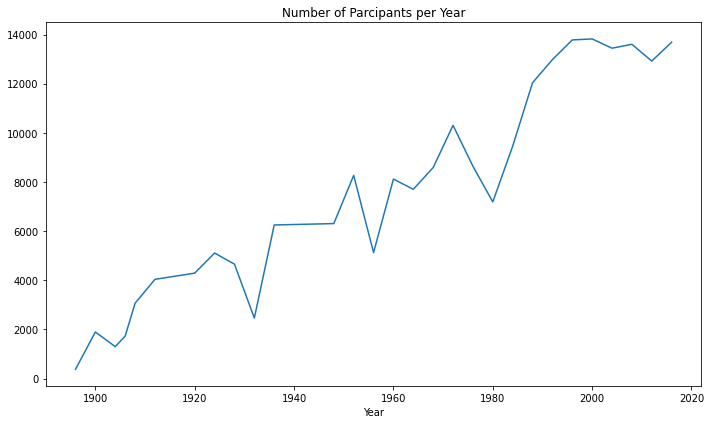

In [50]:
plt.figure(figsize = (10,6))
plt.plot('Year', 'Count', data = Year_count)
plt.xlabel('Year')
plt.title('Number of Parcipants per Year')
plt.tight_layout()
plt.show()

Let's try to visualize the number of participants over the years using the bar graph. To plot a bar graph I am going to use a seaborn library.

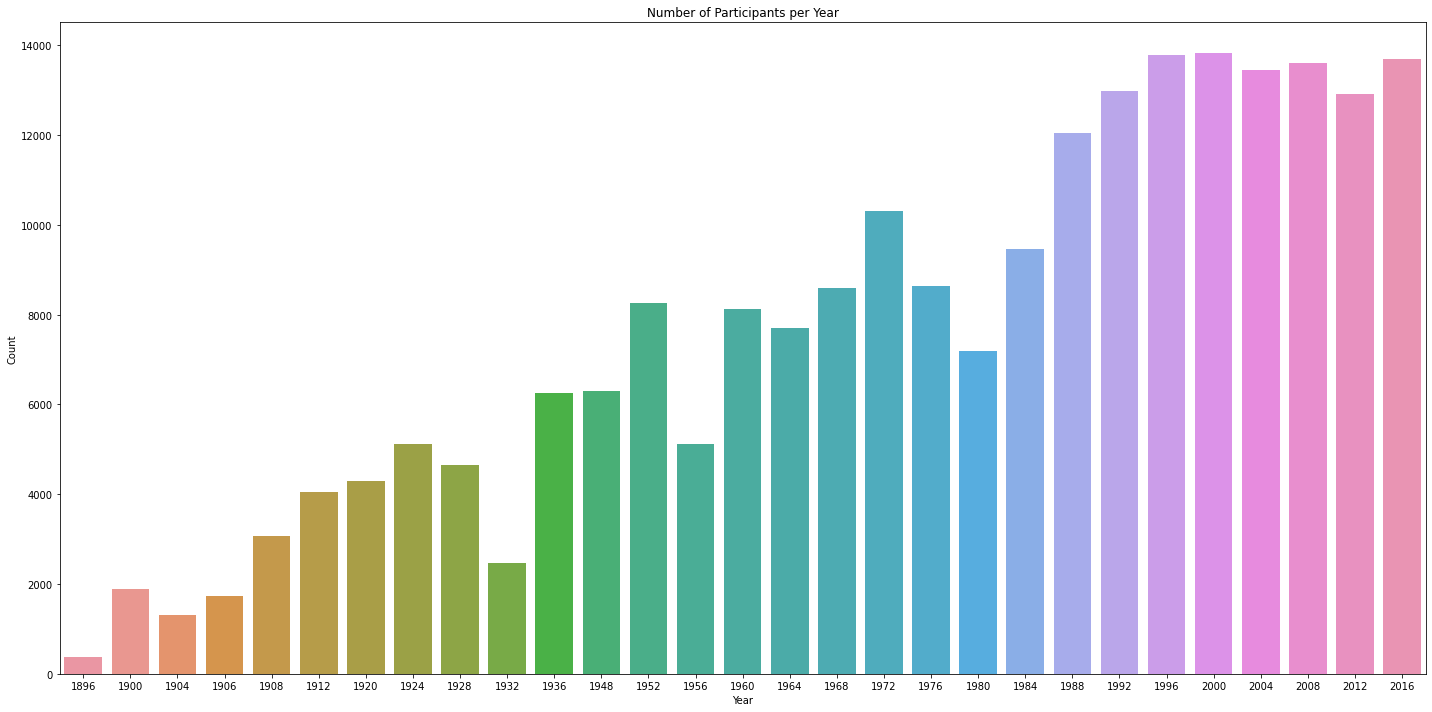

In [51]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Year', y= 'Count', data= Year_count)
plt.title('Number of Participants per Year')
plt.tight_layout()
plt.show()

Both Line Graph and Bar Graph confirms the same trend that the participation has increased over the years, but there is a sharp dip in participation in 1932, 1956 and 1980. Can you think of the reason for this dip?

Let's check the next question.

### Question 3: What is the age of participants those who participated in olympics?

In [52]:
Age_count = df1_summer.groupby(['Age'])['ID'].count().reset_index(name = 'Count')
Age_count

,Age,Count
0,10.0,1
1,11.0,6
2,12.0,31
3,13.0,172
4,14.0,780
...,...,...
70,81.0,2
71,84.0,1
72,88.0,1
73,96.0,1


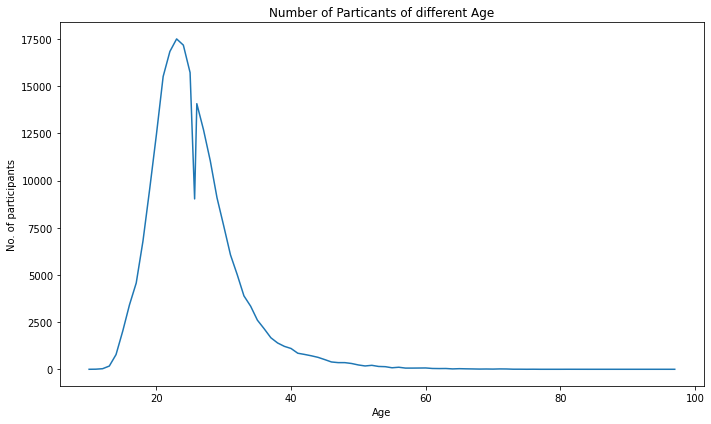

In [53]:
plt.figure(figsize=(10,6))
plt.plot('Age', 'Count', data = Age_count)
plt.xlabel('Age')
plt.ylabel('No. of participants')
plt.title('Number of Particants of different Age')
plt.tight_layout()
plt.show()

The graph of Number of Participants plotted against Age is a bell shaped curves and bell shaped curves follow a Gaussian Distribution. We can clearly see that this curve got its peak about a certain age, let's try visualizing that age by plotting a bar graph.

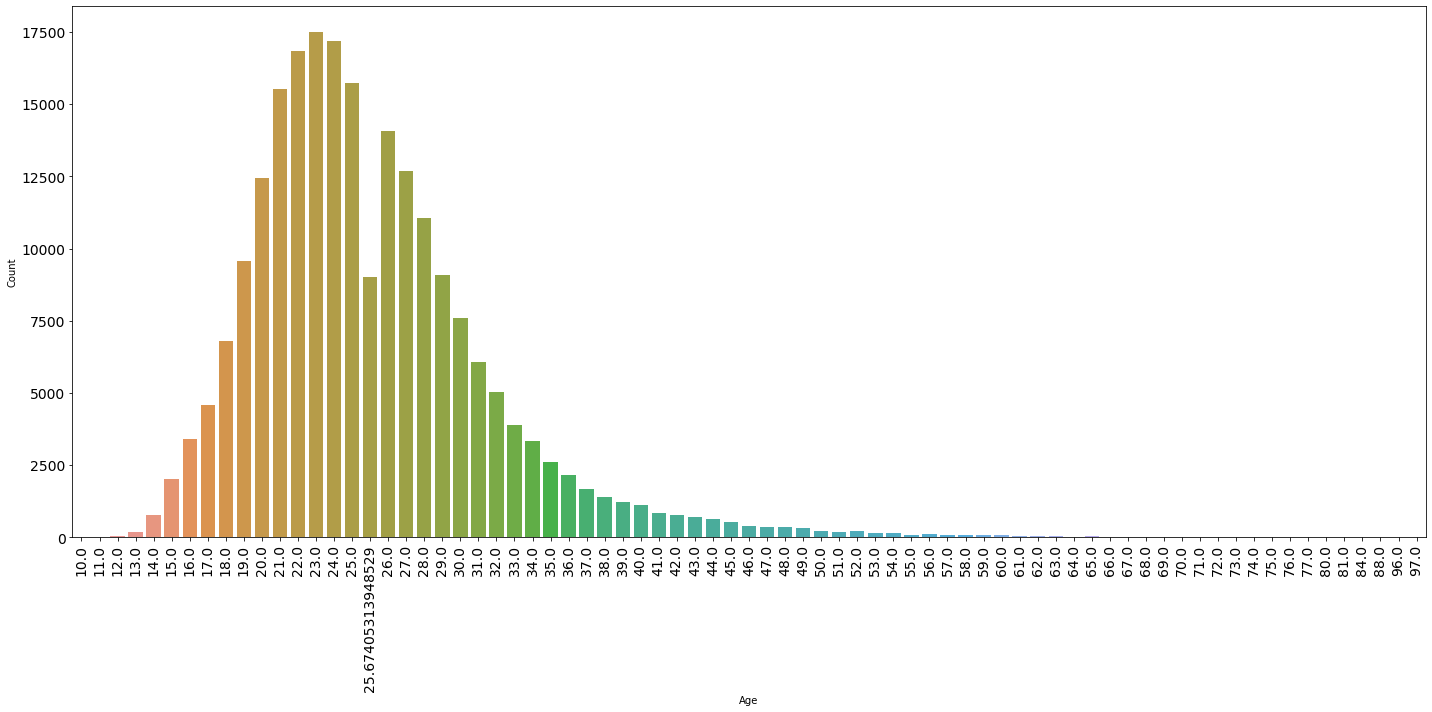

In [54]:
plt.figure(figsize= (20,10))
sns.barplot(x = 'Age', y= 'Count', data= Age_count )
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()

It seems the maximum number of participants are in the age of 15 to 40. So, let's calculate the percentage of participants in this age.

In [55]:
fil =  (15 <= df1_summer['Age']) & (df1_summer['Age'] <= 40)
per =  len(df1_summer[fil]) * 100 /len(df1_summer)
per

96.57001270533127

Almost **97%** participants in olympics are of age between 15-40, with maximum partipants with age 23 years.

There is one sharp dip in the graph between 25 to 26 years participants and the reason for it is because we replaced the missing age values in the data by a mean age. Apart from this it has no other specific importance.

If we notice then there are some sports in Olympics which have participnats over an age of 60. 

What sports people play after the age of 60?

In [56]:
filt = df1_summer['Age']> 60
Sports_60 = df1_summer.loc[filt, 'Sport']
Sports_60

2392      Art Competitions
3944              Shooting
7433      Art Competitions
7496      Art Competitions
7497      Art Competitions
                ...       
261035       Equestrianism
261100             Archery
261101             Archery
261102             Archery
266214    Art Competitions
Name: Sport, Length: 323, dtype: object

In [57]:
Sport_60_percent = Sports_60.value_counts() * 100 /len(Sports_60)
Sport_60_percent

Art Competitions    67.492260
Shooting            10.835913
Equestrianism        9.597523
Archery              5.882353
Sailing              4.953560
Fencing              0.928793
Roque                0.309598
Name: Sport, dtype: float64

68% participants above the age of 60 have participated in Art Competitions. Art competitions formed part of the modern Olympic Games during its early years, from 1912 to 1948.

Let's visualize the percentage of sports contribution played by the participants of age greater than 60.

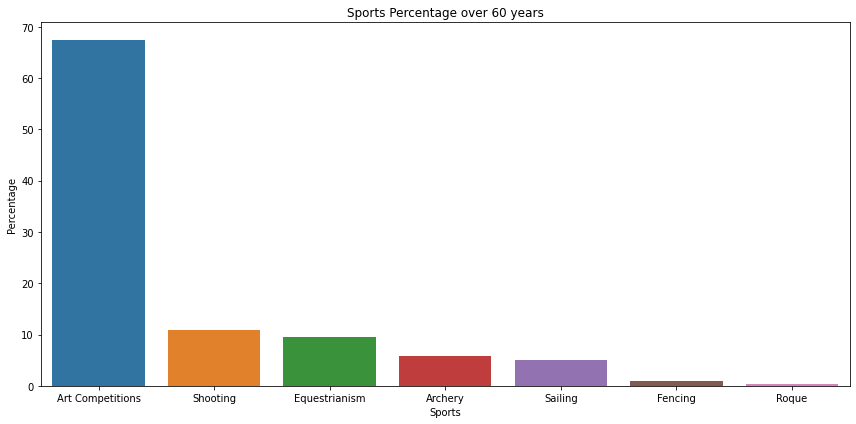

In [58]:
plt.figure(figsize = (12,6))
sns.barplot(x = Sport_60_percent.index, y = Sport_60_percent)
plt.xlabel('Sports')
plt.ylabel('Percentage')
plt.title('Sports Percentage over 60 years')
plt.tight_layout()
plt.show()

### Question 4: Which sports have the maximum contribution in the summer olympics?

In [59]:
df1_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.00000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Not Won
1,2,A Lamusi,M,23.0,170.000000,60.00000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Not Won
2,3,Gunnar Nielsen Aaby,M,24.0,175.515551,70.68906,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Not Won
3,4,Edgar Lindenau Aabye,M,34.0,175.515551,70.68906,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,70.68906,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Not Won


Lots of sports are team event so we cannot directly apply the value_count() and find the sports with maximum contribution in olympics. We will attempt to consider the team events as individual events. 

So, we will first drop the rows which are from the same year, played by the same team in the same sport and in the same event.

In [60]:
Sports_df = df1_summer[~(df1_summer[['Team','Sport','Year','Event']].duplicated(keep = 'first'))].sort_values('Year')
Sports_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
70117,35708,Marie Lon Flameng,M,18.000000,175.515551,70.68906,France,FRA,1896 Summer,1896,Summer,Athina,Cycling,"Cycling Men's 10,000 metres",Silver
182919,91932,"Khios ""Konstantinos"" Paspatis",M,17.000000,175.515551,70.68906,Greece-2,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,Not Won
7998,4431,Georgios Anninos,M,25.674053,175.515551,70.68906,Greece,GRE,1896 Summer,1896,Summer,Athina,Swimming,Swimming Men's 100 metres Freestyle,Not Won
56763,29084,Kurt Wilhelm Doerry,M,21.000000,179.000000,73.00000,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 400 metres,Not Won
76565,38860,"Robert ""Bob"" Garrett",M,20.000000,188.000000,81.00000,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Discus Throw,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214651,107763,Brandon Schuster,M,18.000000,188.000000,75.00000,Samoa,SAM,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Freestyle,Not Won
132197,66530,Arthur Lanigan-O'Keeffe,M,24.000000,182.000000,76.00000,Ireland,IRL,2016 Summer,2016,Summer,Rio de Janeiro,Modern Pentathlon,Modern Pentathlon Men's Individual,Not Won
19616,10351,Katarna Bereov,F,28.000000,162.000000,49.00000,Slovakia,SVK,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Marathon,Not Won
73762,37482,Takuro Fujii,M,31.000000,184.000000,82.00000,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Not Won


Let's plot the bar graph using countplot() to get the idea of sports which have the maximum contribution in the summer olympics from 1896 to 2016.

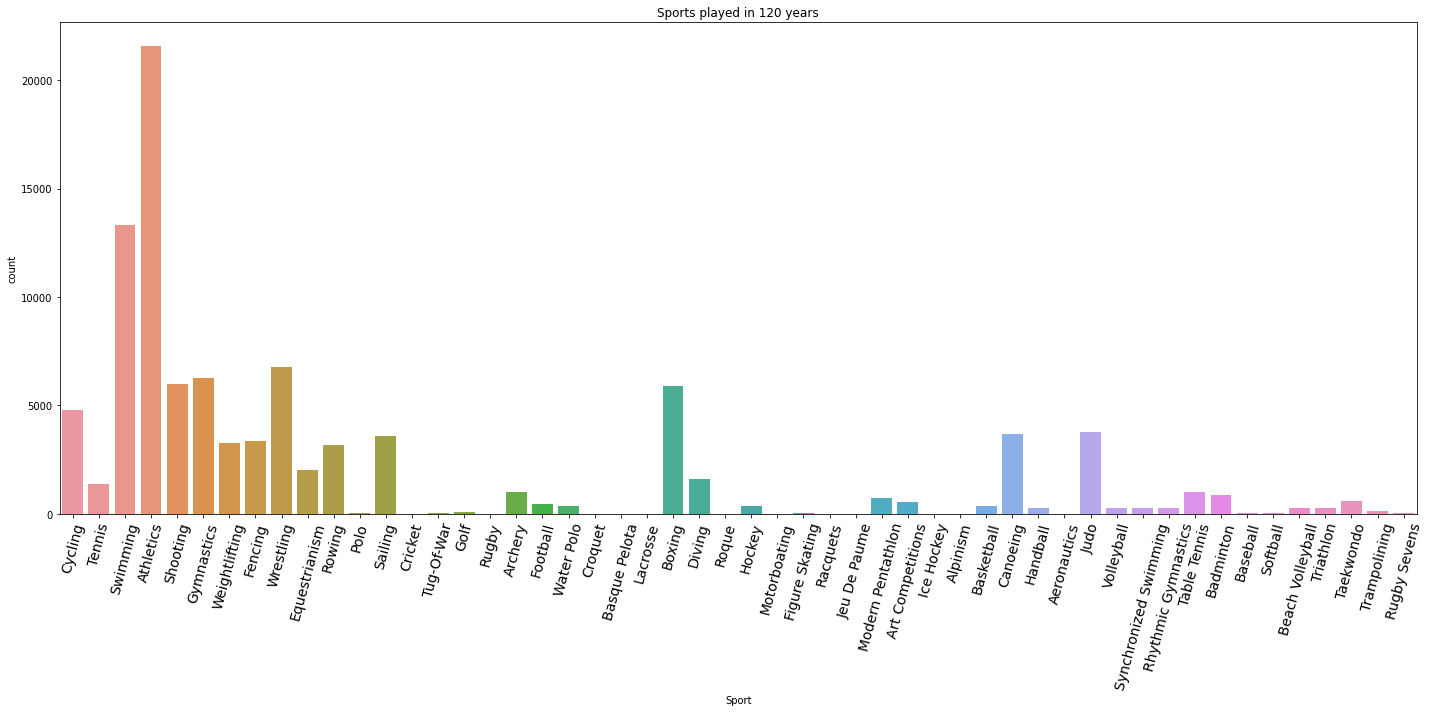

In [61]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 75, fontsize = 14)
sns.countplot(x = 'Sport', data = Sports_df)
plt.title('Sports played in 120 years')
plt.tight_layout()
plt.show()

We can clearly see that Athletics has been the most prominent sports in the summer olympics history followed by the sports like Swimming, Wrestling, Gymnastics and Shooting. By doing a little bit of research I got to know that the International Olympic Committee has reportedly voted to drop **Wrestling** from the 2020 Olympics.

### Question 5: What is the male and female participation trend?

Let's find only male participation in summer olympics from 1896 to 2016.

In [62]:
filt1 = df1_summer['Sex'] == 'M'
Men_year = df1_summer[filt1]['Year'].value_counts().sort_index()
Men_year

1896     380
1900    1865
1904    1285
1906    1722
1908    3022
1912    3953
1920    4158
1924    4876
1928    4265
1932    2200
1936    5804
1948    5698
1952    6773
1956    4234
1960    6684
1964    6354
1968    6811
1972    8111
1976    6469
1980    5435
1984    7007
1988    8494
1992    8853
1996    8772
2000    8390
2004    7897
2008    7786
2012    7105
2016    7465
Name: Year, dtype: int64

Now, let's find only female participation in summer olympics from 1896 to 2016.

In [63]:
filt2 = df1_summer['Sex'] == 'F'
Women_year = df1_summer[filt2]['Year'].value_counts().sort_index()
Women_year

1900      33
1904      16
1906      11
1908      47
1912      87
1920     134
1924     234
1928     391
1932     265
1936     447
1948     610
1952    1497
1956     893
1960    1435
1964    1348
1968    1777
1972    2193
1976    2172
1980    1756
1984    2447
1988    3543
1992    4124
1996    5008
2000    5431
2004    5546
2008    5816
2012    5815
2016    6223
Name: Year, dtype: int64

Let's plot both the data series and check the male and female participation trend over the years.

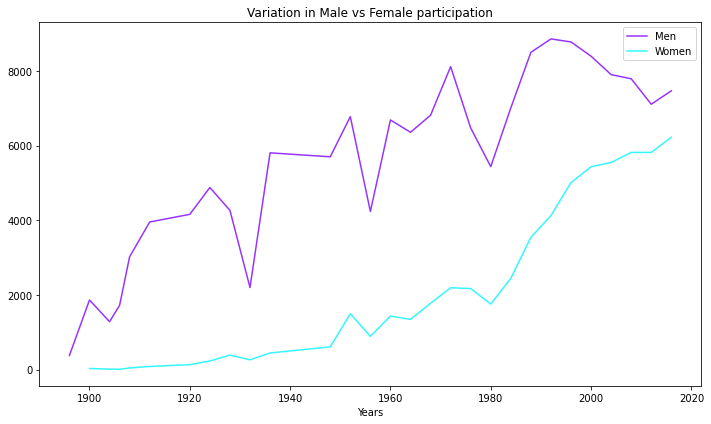

In [64]:
plt.figure(figsize = (10,6))
Men_year.plot(label = 'Men', color = '#9733FF')
Women_year.plot(label = 'Women', color = '#33F7FF' )

plt.xlabel('Years')
plt.title('Variation in Male vs Female participation')
plt.legend()
plt.tight_layout()
plt.show()

No data is available for the women during the 1896 Olympics. After crosschecking I got to know that the Women were not allowed to participate in 1896 olympics.

Let's plot the bargraph for both Men and Women and see the the highs and lows of the participation year by year.

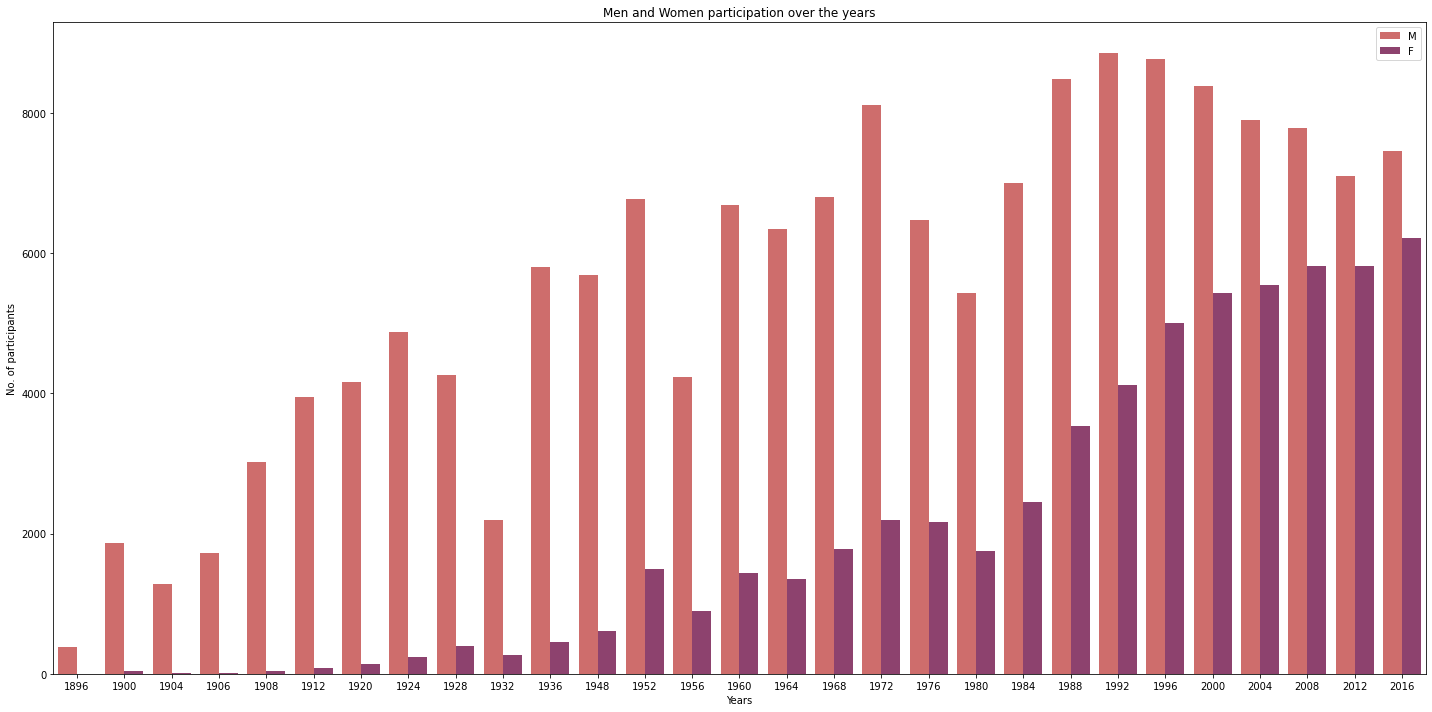

In [65]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'Year', hue = 'Sex', data = df1_summer, palette = "flare")


plt.xlabel('Years')
plt.ylabel('No. of participants')
plt.title('Men and Women participation over the years')

plt.legend()
plt.tight_layout()
plt.show()

We can clearly see that the overall participation of both Men and Women has increased over the years with a slight dip in Men participation after the years 1996. 

There were certain times in the century when the overall participation has dropped drastically, the reasons for that was the Great Depression of 1932, 1956 Olympic Bycott and 1980 Olympics Bycott, 1980 Olympics which was hosted in Moscow was bycotted by many nation due to Russia invasion of Afghanistan.

Now let's find the Sports in which Women have won the medals.

In [66]:
filt = (df1_summer['Sex'] == 'F') & (df1_summer['Medal'] != 'Not Won' )
Medal_women = df1_summer[filt]
Medal_women.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.000000,70.68906,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,29,Willemien Aardenburg,F,22.0,175.515551,70.68906,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,37,Ann Kristin Aarnes,F,23.0,182.000000,64.00000,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,65,Patimat Abakarova,F,21.0,165.000000,49.00000,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.000000,80.00000,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


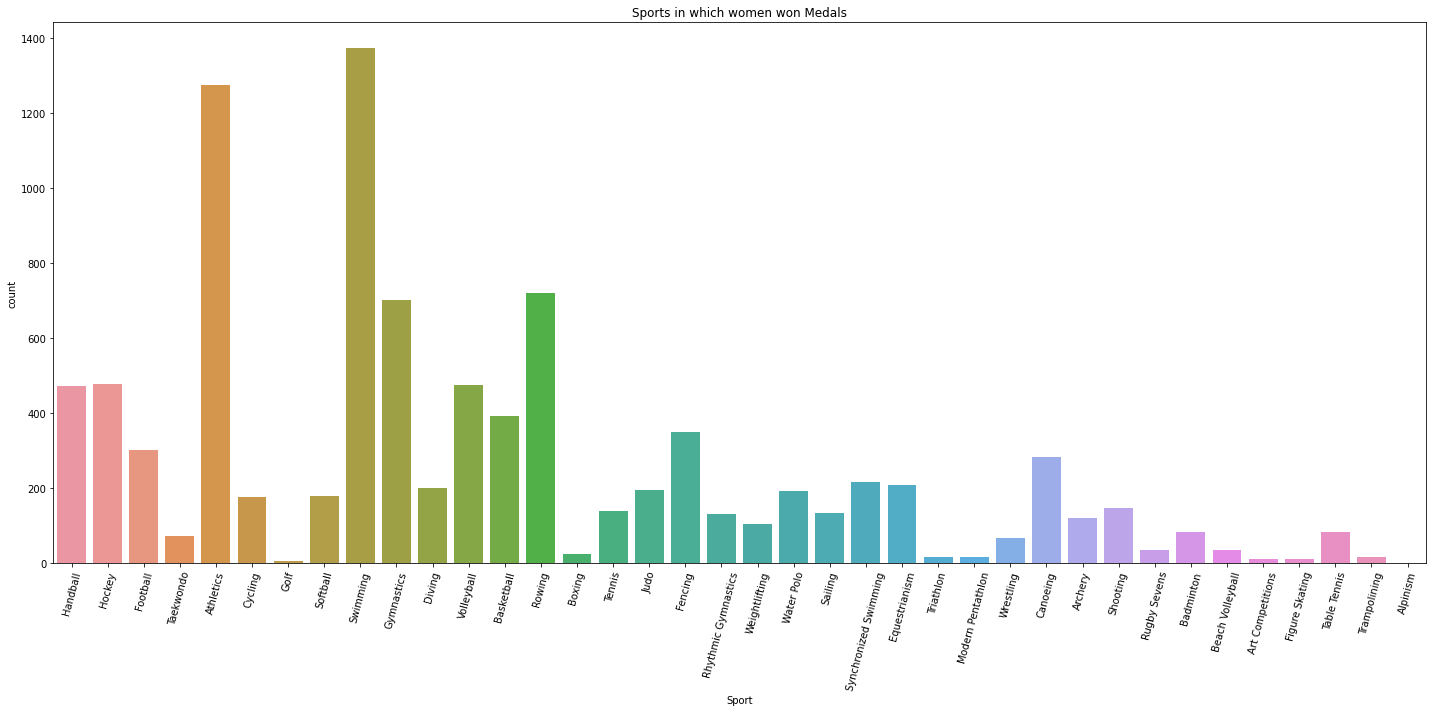

In [67]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 75)
sns.countplot(x = 'Sport', data = Medal_women)
plt.title('Sports in which women won Medals')
plt.tight_layout()
plt.show()

Women win maximum medals in sports like Swimming, Athletics, Gymnastics, Running and Volleyball.

Now out of these sports in which women have won the Medals are there any sports which are only played by women? 

Let's group the dataframe by Sport and apply the value_counts() to find the number of participants from both Male and Female category in each sport ever played in the history of Olympics from 1896 to 2016.

In [68]:
sport_group = df1_summer.groupby(['Sport']).Sex.value_counts()
sport_group

Sport          Sex
Aeronautics    M         1
Alpinism       M         3
               F         1
Archery        M      1319
               F      1015
                      ... 
Water Polo     F       488
Weightlifting  M      3474
               F       463
Wrestling      M      6850
               F       304
Name: Sex, Length: 89, dtype: int64

Now, lets find the sports which are only played by females and no male category is present for these sports.

In [69]:
df_sport_group = sport_group.unstack()
df_sport_group.fillna(0, inplace = True)
Female_Events = df_sport_group[df_sport_group['M'] == 0]
Female_Events.head()

Sex,F,M
Sport,,
Rhythmic Gymnastics,658.0,0.0
Softball,478.0,0.0
Synchronized Swimming,909.0,0.0


**Rhythmic Gymnastics, Softball, Synchronized Swimming** are only played by Female participants.

Now, I am curious to know are there any sports which are only played by Male participants.

In [70]:
df_sport_group = sport_group.unstack()
df_sport_group.fillna(0, inplace = True)
Male_Events = df_sport_group[df_sport_group['F'] == 0]
Male_Events.head(20)

Sex,F,M
Sport,,
Aeronautics,0.0,1.0
Baseball,0.0,894.0
Basque Pelota,0.0,2.0
Cricket,0.0,24.0
Ice Hockey,0.0,60.0
Jeu De Paume,0.0,11.0
Lacrosse,0.0,60.0
Polo,0.0,95.0
Racquets,0.0,12.0


So, there are **12** sports which are only played by Male participants, although I have not checked whether all of them are still continued by the Olympics committee.

## Summary


   * United Stated has bragged the maximum number of Medals in the history of Olympics. 
   
   * Soviet Union first participated in 1952 for the first time but its still in the top three positions before 1991, this show the strength of the participants from Soviet Union. 
   
   * After 1991, there are 3 countries Australia, Russia and Germany after United States which are in the medal winning race.
   
   * Every year the number of Participants have increased in Olympics with exception in 1932, 1956 and 1980.
   
   * 97% participants in olympics are of age between 15-40, with maximum partipants with age 23 years.
   
   * There are some sports which are even played by the people of age more than 60. 68% people above the age of 60 have participated in Art Competitions. It formed the part of the modern Olympic Games during its early years, from 1912 to 1948.
   
   * Sports like Athletics, Swimming, Wrestling, Gymnastics and Shooting are the top five sports which have maximum contribution in terms of participants to the summer olympic games.
   
   * Men participation in Summer Olympics has dropped after the year 1996. Overall participation dropped in 1932, 1956 and 1980 due to Great Depression and the Olympics Bycott by the various countries.
   
   * Women win maximum medals in sports like Swimming, Athletics, Gymnastics, Running and Volleyball.
   
   * There are 3 sports which are only played by Women and 12 sports which are only played by Men.

If you liked the notebook then please upvote it and if you have any suggestions then do let me know in the comment section.